# Your info

Full name: Babak Behkam Kia

Student ID: 98521099

# Q2. MLP

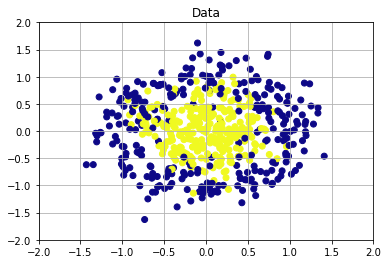

In [124]:
# Q2_graded
# Do not change the above line.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
np.random.seed(0)
# Dataset
X,Y = datasets.make_circles(n_samples=576, shuffle=True, noise=0.25, random_state=None, factor=0.4)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('Data')
plt.show()

### dar in cell activation function hayeman ra taarif kardim ta dar edame code az anha estefade konim

In [125]:
# Q2_graded

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0
    return dZ

### vazn haye model ra ba yek value kam taarif mikonim va dar dictionary be esm param zakhire mikonim

In [126]:
# Q2_graded

def create_model(layers):
  params = {}
  for i in range(len(layers)):
    if i == len(layers)-1:
      params[f"W{i+1}"] = np.random.randn(1, layers[i]) * 0.01
      params[f"b{i+1}"] = np.random.randn(1, 1) * 0.01
    else:
      params[f"W{i+1}"] = np.random.randn(layers[i+1], layers[i]) * 0.01
      params[f"b{i+1}"] = np.random.randn(layers[i+1], 1) * 0.01

  return params

### amaliat forward propagation ra anjam midahim

In [127]:
# Q2_graded

def forward(X, params, layers, training=True):
    memory = {}
    A_curr = X
    for i in range(len(layers)):
        A_prev = A_curr
        # print(A_prev.shape)
        Z_curr = np.dot(params[f"W{i+1}"], A_prev) + params[f"b{i+1}"]
        if i == len(layers)-1:
            A_curr = sigmoid(Z_curr)
            # print('sigmoid')
        else:
            A_curr = relu(Z_curr)
            # print('relu')
        if training:
            memory[f"A{i}"] = A_prev
            memory[f"Z{i+1}"] = Z_curr
       
    return A_curr, memory

### amaliat backward propagation ra anjam midahim

In [128]:
# Q2_graded

def backward(Y_pred, Y, memory, params, layers):
    grads_values = {}
    Y = Y.reshape(Y_pred.shape)
   
    dA_prev = - (np.divide(Y, Y_pred) - np.divide(1 - Y, 1 - Y_pred));    

    for i in range(len(layers)-1,-1,-1):
        dA_curr = dA_prev

        n = memory[f"A{i}"].shape[1]

        if i == len(layers)-1:
            dZ_curr = sigmoid_backward(dA_curr, memory[f"Z{i+1}"])
        else:
            dZ_curr = relu_backward(dA_curr, memory[f"Z{i+1}"])
        dW_curr = np.dot(dZ_curr, memory[f"A{i}"].T) / n
        db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / n
        dA_prev = np.dot(params[f"W{i+1}"].T, dZ_curr)

        grads_values[f"dW{i+1}"] = dW_curr
        grads_values[f"db{i+1}"] = db_curr
    
    return grads_values

### vazn hara update mikonim

In [129]:
# Q2_graded

def update(params, grads_values, layers, learning_rate):
    for i in range(len(layers)):
        params[f"W{i+1}"] -= learning_rate * grads_values[f"dW{i+1}"]        
        params[f"b{i+1}"] -= learning_rate * grads_values[f"db{i+1}"]

    return params

In [130]:
# Q2_graded

def convert_prob_into_class(Y_pred):
    result = []
    Y_pred_ = Y_pred.reshape(-1)
    # print(Y_pred)
    return Y_pred >= 0.5

### loss function va function accuracy

In [131]:
# Q2_graded

def loss_function(Y_pred, Y):
    m = Y_pred.shape[1]
    cost = -1 / m * (np.dot(Y, np.log(Y_pred).T) + np.dot(1 - Y, np.log(1 - Y_pred).T))
    return np.squeeze(cost)

def get_accuracy(Y_pred, Y):
    predicted_classes = convert_prob_into_class(Y_pred)
    Y_pred_ = Y_pred.reshape(-1)
    # return (Y_pred_ == Y).all(axis=0).mean()
    result = (predicted_classes == Y)
    return result.sum() / len(Y)

## function baraye plot kardan Decision Boundary

In [132]:
# Q2_graded

def decision_boundary(sample_X, weights, layers):

    x1_min, x1_max = sample_X[0, :].min() - 1, sample_X[0, :].max() + 1
    x2_min, x2_max = sample_X[1, :].min() - 1, sample_X[1, :].max() + 1
    h = 0.01

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

    Z, _ = forward(np.c_[xx1.ravel(), xx2.ravel()].T, weights, layers, training=False)
    Z = Z.reshape(-1)
    Z[Z > 0.5] = 1
    Z[Z < 0.5] = 0
    Z = Z.reshape(xx1.shape)

    plt.figure()
    plt.contourf(xx1, xx2, Z, cmap=plt.cm.Spectral)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.scatter(sample_X[0, :], sample_X[1, :], c=Y, cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")
    plt.show()

### function train baraye tarkib kardan code haye zade shode

In [133]:
# Q2_graded

def train(X, Y, layers, epochs, learning_rate):
    params = create_model(layers)
    cost_history = []
    accuracy_history = []
    
    for i in range(epochs):
        Y_pred, cashe = forward(X, params, layers)
        cost = loss_function(Y_pred, Y)
        cost_history.append(cost)
        accuracy = get_accuracy(Y_pred, Y)
        accuracy_history.append(accuracy)
        
        grads_values = backward(Y_pred, Y, cashe, params, layers)
        params = update(params, grads_values, layers, learning_rate)

    fig, ax = plt.subplots()
    ax.plot(accuracy_history, label='acc')
    ax.plot(cost_history,label='loss')
    leg = ax.legend()

    decision_boundary(X, params, layers)
        
    # return params, cost_history, accuracy_history

model with 1 hidden layers and 256 nouron each


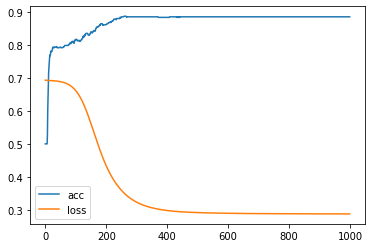

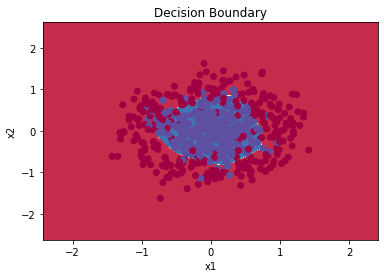

model with 1 hidden layers and 512 nouron each


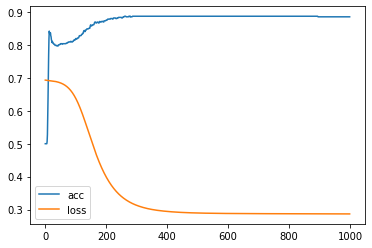

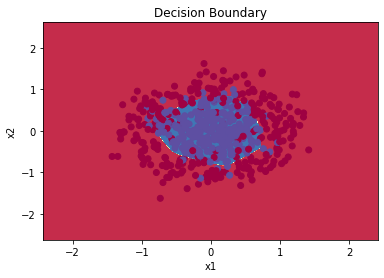

model with 1 hidden layers and 768 nouron each


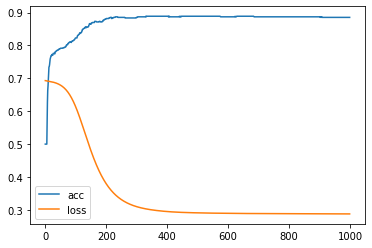

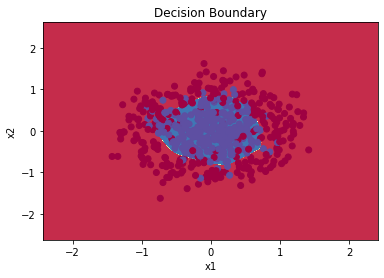

model with 2 hidden layers and 256 nouron each


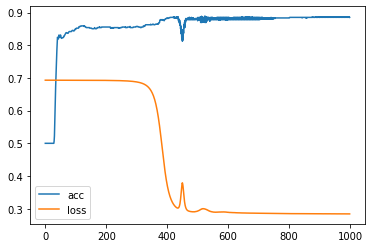

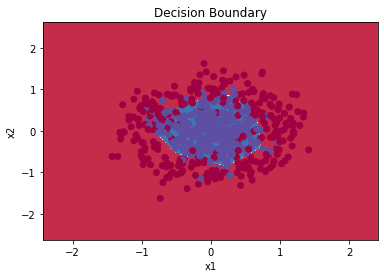

model with 2 hidden layers and 512 nouron each


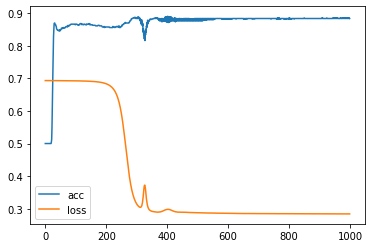

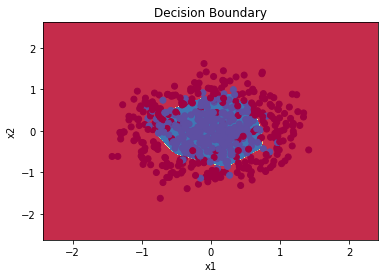

model with 2 hidden layers and 768 nouron each


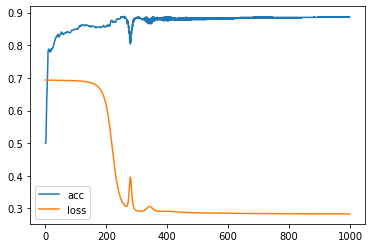

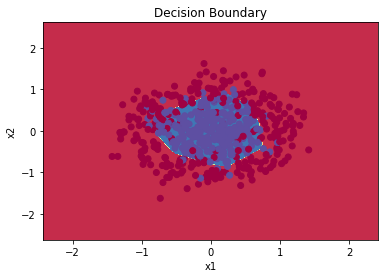

model with 3 hidden layers and 256 nouron each


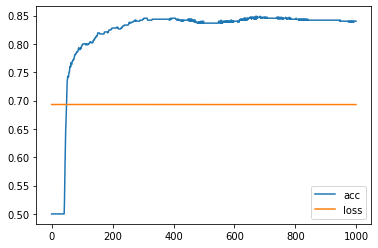

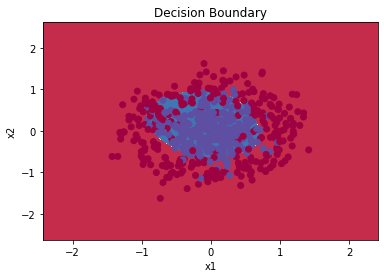

model with 3 hidden layers and 512 nouron each


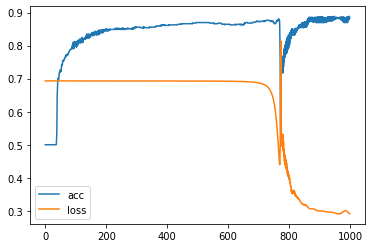

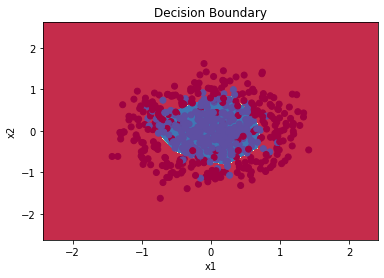

model with 3 hidden layers and 768 nouron each


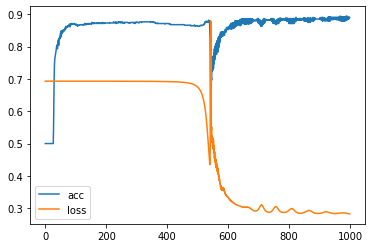

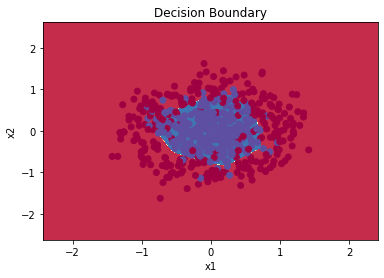

In [104]:
# Q2_graded
# Do not change the above line.

# layers  (input layer, hidden layers)
for i in range(1, 4):  
    for j in range(1,4):
        layers = [2]
        for k in range(i):
            layers.append(256*j)

        print(f"model with {i} hidden layers and {j*256} nouron each")
        # calling the train function for training the model
        train(X.T, Y, layers, 1000, 0.5)  # (train_dataset, train_labels, layers, epochs, learning rate)
        print("=====================================================")
# Type your code here

# Q3. Keras


In [134]:
# Q3_graded

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


def create_train_model(x_train, y_train, x_test, y_test, layer_num, weight_decay, momentum):
    inputs = Input(shape=x_train[0].shape)
    h = Flatten()(inputs)

    for i in range(layer_num):
        h = Dense(256, activation="relu")(h)
    outputs = Dense(10, activation="softmax")(h)

    model = Model(inputs=inputs,outputs=outputs)

    early_stopping=EarlyStopping(monitor='val_accuracy',patience=5,min_delta=0.01,mode='max')
    # learning_rate_reduction=ReduceLROnPlateau(patience=5,factor=0.2,min_lr=0.0001)

    if momentum and weight_decay:
        model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, decay = 0.01 / 50),
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                  )
    elif momentum:
        model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                  )
    elif weight_decay:
        model.compile(optimizer=SGD(learning_rate=0.01, decay = 0.01 / 50),
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                  )
    else:
        model.compile(optimizer=SGD(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                  )

    history = model.fit(x_train, y_train, batch_size=256, epochs=200, verbose=2, validation_split=0.1, callbacks=[early_stopping])

    print(f"layer_num = {layer_num}, weight_decay = {weight_decay}, momentum = {momentum}")
    # fig, ax = plt.subplots()
    # ax.plot(history.history["val_accuracy"], label='val_acc')
    # ax.plot(history.history["val_loss"],label='val_loss')
    # leg = ax.legend();
    plt.plot(history.history["val_accuracy"])
    plt.show()
    # ax.title(f"layer_num = {layer_num}")
    print("=========================================")


Epoch 1/200
176/176 - 5s - loss: 1.8942 - accuracy: 0.3207 - val_loss: 1.7780 - val_accuracy: 0.3592 - 5s/epoch - 30ms/step
Epoch 2/200
176/176 - 5s - loss: 1.6936 - accuracy: 0.3996 - val_loss: 1.6696 - val_accuracy: 0.4030 - 5s/epoch - 26ms/step
Epoch 3/200
176/176 - 5s - loss: 1.6049 - accuracy: 0.4325 - val_loss: 1.6044 - val_accuracy: 0.4396 - 5s/epoch - 26ms/step
Epoch 4/200
176/176 - 5s - loss: 1.5528 - accuracy: 0.4496 - val_loss: 1.5994 - val_accuracy: 0.4272 - 5s/epoch - 27ms/step
Epoch 5/200
176/176 - 5s - loss: 1.5058 - accuracy: 0.4649 - val_loss: 1.5542 - val_accuracy: 0.4474 - 5s/epoch - 30ms/step
Epoch 6/200
176/176 - 6s - loss: 1.4776 - accuracy: 0.4753 - val_loss: 1.4918 - val_accuracy: 0.4714 - 6s/epoch - 36ms/step
Epoch 7/200
176/176 - 6s - loss: 1.4422 - accuracy: 0.4876 - val_loss: 1.4568 - val_accuracy: 0.4872 - 6s/epoch - 34ms/step
Epoch 8/200
176/176 - 6s - loss: 1.4129 - accuracy: 0.4979 - val_loss: 1.4573 - val_accuracy: 0.4774 - 6s/epoch - 32ms/step
Epoch 9/

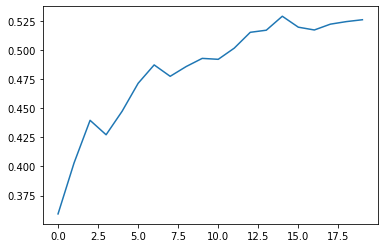

Epoch 1/200
176/176 - 6s - loss: 1.9160 - accuracy: 0.3120 - val_loss: 1.7737 - val_accuracy: 0.3786 - 6s/epoch - 31ms/step
Epoch 2/200
176/176 - 5s - loss: 1.6989 - accuracy: 0.3978 - val_loss: 1.6654 - val_accuracy: 0.4100 - 5s/epoch - 26ms/step
Epoch 3/200
176/176 - 5s - loss: 1.6113 - accuracy: 0.4269 - val_loss: 1.6148 - val_accuracy: 0.4324 - 5s/epoch - 26ms/step
Epoch 4/200
176/176 - 5s - loss: 1.5574 - accuracy: 0.4466 - val_loss: 1.5584 - val_accuracy: 0.4564 - 5s/epoch - 28ms/step
Epoch 5/200
176/176 - 5s - loss: 1.5151 - accuracy: 0.4643 - val_loss: 1.5292 - val_accuracy: 0.4634 - 5s/epoch - 26ms/step
Epoch 6/200
176/176 - 5s - loss: 1.4806 - accuracy: 0.4786 - val_loss: 1.4884 - val_accuracy: 0.4736 - 5s/epoch - 26ms/step
Epoch 7/200
176/176 - 6s - loss: 1.4496 - accuracy: 0.4851 - val_loss: 1.4715 - val_accuracy: 0.4798 - 6s/epoch - 32ms/step
Epoch 8/200
176/176 - 5s - loss: 1.4197 - accuracy: 0.4971 - val_loss: 1.4657 - val_accuracy: 0.4776 - 5s/epoch - 26ms/step
Epoch 9/

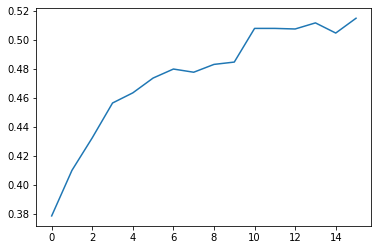

Epoch 1/200
176/176 - 7s - loss: 2.0885 - accuracy: 0.2616 - val_loss: 1.9777 - val_accuracy: 0.2914 - 7s/epoch - 38ms/step
Epoch 2/200
176/176 - 6s - loss: 1.9169 - accuracy: 0.3275 - val_loss: 1.8908 - val_accuracy: 0.3334 - 6s/epoch - 34ms/step
Epoch 3/200
176/176 - 5s - loss: 1.8512 - accuracy: 0.3511 - val_loss: 1.8530 - val_accuracy: 0.3452 - 5s/epoch - 28ms/step
Epoch 4/200
176/176 - 5s - loss: 1.8115 - accuracy: 0.3672 - val_loss: 1.8138 - val_accuracy: 0.3670 - 5s/epoch - 26ms/step
Epoch 5/200
176/176 - 8s - loss: 1.7793 - accuracy: 0.3802 - val_loss: 1.7899 - val_accuracy: 0.3744 - 8s/epoch - 43ms/step
Epoch 6/200
176/176 - 7s - loss: 1.7542 - accuracy: 0.3892 - val_loss: 1.7625 - val_accuracy: 0.3862 - 7s/epoch - 39ms/step
Epoch 7/200
176/176 - 4s - loss: 1.7315 - accuracy: 0.3988 - val_loss: 1.7417 - val_accuracy: 0.4014 - 4s/epoch - 25ms/step
Epoch 8/200
176/176 - 4s - loss: 1.7121 - accuracy: 0.4056 - val_loss: 1.7287 - val_accuracy: 0.4024 - 4s/epoch - 25ms/step
Epoch 9/

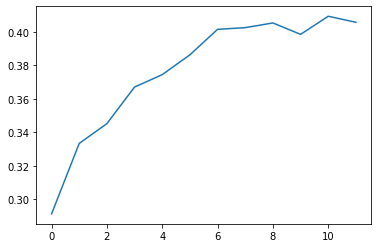

Epoch 1/200
176/176 - 5s - loss: 2.0830 - accuracy: 0.2602 - val_loss: 1.9686 - val_accuracy: 0.3000 - 5s/epoch - 30ms/step
Epoch 2/200
176/176 - 4s - loss: 1.9086 - accuracy: 0.3290 - val_loss: 1.8878 - val_accuracy: 0.3284 - 4s/epoch - 26ms/step
Epoch 3/200
176/176 - 5s - loss: 1.8427 - accuracy: 0.3522 - val_loss: 1.8372 - val_accuracy: 0.3566 - 5s/epoch - 26ms/step
Epoch 4/200
176/176 - 5s - loss: 1.8002 - accuracy: 0.3675 - val_loss: 1.7992 - val_accuracy: 0.3646 - 5s/epoch - 26ms/step
Epoch 5/200
176/176 - 5s - loss: 1.7684 - accuracy: 0.3841 - val_loss: 1.7779 - val_accuracy: 0.3696 - 5s/epoch - 26ms/step
Epoch 6/200
176/176 - 4s - loss: 1.7424 - accuracy: 0.3924 - val_loss: 1.7484 - val_accuracy: 0.3902 - 4s/epoch - 26ms/step
Epoch 7/200
176/176 - 5s - loss: 1.7176 - accuracy: 0.3995 - val_loss: 1.7304 - val_accuracy: 0.3940 - 5s/epoch - 26ms/step
Epoch 8/200
176/176 - 4s - loss: 1.6979 - accuracy: 0.4083 - val_loss: 1.7083 - val_accuracy: 0.4012 - 4s/epoch - 25ms/step
Epoch 9/

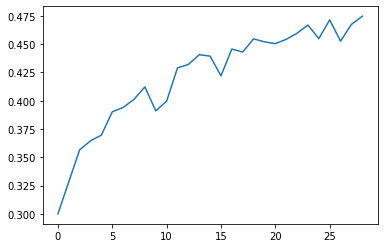

Epoch 1/200
176/176 - 9s - loss: 1.9090 - accuracy: 0.3092 - val_loss: 1.7949 - val_accuracy: 0.3612 - 9s/epoch - 50ms/step
Epoch 2/200
176/176 - 6s - loss: 1.7024 - accuracy: 0.3914 - val_loss: 1.6519 - val_accuracy: 0.4084 - 6s/epoch - 36ms/step
Epoch 3/200
176/176 - 6s - loss: 1.6119 - accuracy: 0.4247 - val_loss: 1.6015 - val_accuracy: 0.4296 - 6s/epoch - 33ms/step
Epoch 4/200
176/176 - 5s - loss: 1.5526 - accuracy: 0.4491 - val_loss: 1.5500 - val_accuracy: 0.4466 - 5s/epoch - 29ms/step
Epoch 5/200
176/176 - 5s - loss: 1.5074 - accuracy: 0.4641 - val_loss: 1.4985 - val_accuracy: 0.4708 - 5s/epoch - 29ms/step
Epoch 6/200
176/176 - 7s - loss: 1.4710 - accuracy: 0.4771 - val_loss: 1.4883 - val_accuracy: 0.4684 - 7s/epoch - 41ms/step
Epoch 7/200
176/176 - 6s - loss: 1.4264 - accuracy: 0.4935 - val_loss: 1.4484 - val_accuracy: 0.4812 - 6s/epoch - 36ms/step
Epoch 8/200
176/176 - 5s - loss: 1.3997 - accuracy: 0.5029 - val_loss: 1.4478 - val_accuracy: 0.4888 - 5s/epoch - 31ms/step
Epoch 9/

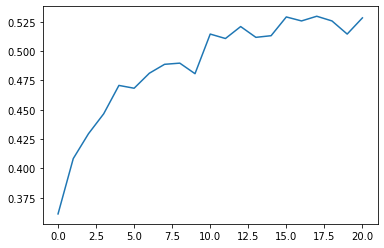

Epoch 1/200
176/176 - 6s - loss: 1.9084 - accuracy: 0.3106 - val_loss: 1.7598 - val_accuracy: 0.3746 - 6s/epoch - 36ms/step
Epoch 2/200
176/176 - 5s - loss: 1.7087 - accuracy: 0.3902 - val_loss: 1.6721 - val_accuracy: 0.4076 - 5s/epoch - 28ms/step
Epoch 3/200
176/176 - 5s - loss: 1.6144 - accuracy: 0.4264 - val_loss: 1.5833 - val_accuracy: 0.4340 - 5s/epoch - 28ms/step
Epoch 4/200
176/176 - 5s - loss: 1.5629 - accuracy: 0.4433 - val_loss: 1.6013 - val_accuracy: 0.4192 - 5s/epoch - 29ms/step
Epoch 5/200
176/176 - 5s - loss: 1.5089 - accuracy: 0.4597 - val_loss: 1.5300 - val_accuracy: 0.4530 - 5s/epoch - 28ms/step
Epoch 6/200
176/176 - 5s - loss: 1.4745 - accuracy: 0.4734 - val_loss: 1.4795 - val_accuracy: 0.4784 - 5s/epoch - 28ms/step
Epoch 7/200
176/176 - 5s - loss: 1.4470 - accuracy: 0.4865 - val_loss: 1.4724 - val_accuracy: 0.4836 - 5s/epoch - 29ms/step
Epoch 8/200
176/176 - 5s - loss: 1.4162 - accuracy: 0.4963 - val_loss: 1.4775 - val_accuracy: 0.4766 - 5s/epoch - 29ms/step
Epoch 9/

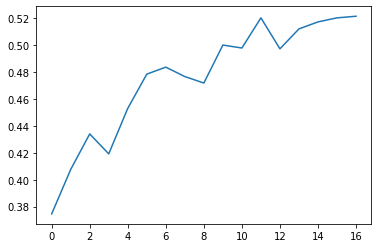

Epoch 1/200
176/176 - 6s - loss: 2.1271 - accuracy: 0.2402 - val_loss: 2.0157 - val_accuracy: 0.2920 - 6s/epoch - 32ms/step
Epoch 2/200
176/176 - 5s - loss: 1.9553 - accuracy: 0.3111 - val_loss: 1.9214 - val_accuracy: 0.3118 - 5s/epoch - 28ms/step
Epoch 3/200
176/176 - 5s - loss: 1.8807 - accuracy: 0.3407 - val_loss: 1.8903 - val_accuracy: 0.3164 - 5s/epoch - 28ms/step
Epoch 4/200
176/176 - 5s - loss: 1.8348 - accuracy: 0.3584 - val_loss: 1.8599 - val_accuracy: 0.3536 - 5s/epoch - 27ms/step
Epoch 5/200
176/176 - 5s - loss: 1.7975 - accuracy: 0.3697 - val_loss: 1.8078 - val_accuracy: 0.3622 - 5s/epoch - 28ms/step
Epoch 6/200
176/176 - 5s - loss: 1.7679 - accuracy: 0.3796 - val_loss: 1.7822 - val_accuracy: 0.3726 - 5s/epoch - 28ms/step
Epoch 7/200
176/176 - 5s - loss: 1.7455 - accuracy: 0.3880 - val_loss: 1.7614 - val_accuracy: 0.3806 - 5s/epoch - 28ms/step
Epoch 8/200
176/176 - 5s - loss: 1.7202 - accuracy: 0.3960 - val_loss: 1.7309 - val_accuracy: 0.3948 - 5s/epoch - 28ms/step
Epoch 9/

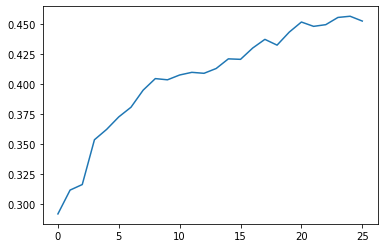

Epoch 1/200
176/176 - 6s - loss: 2.1299 - accuracy: 0.2342 - val_loss: 2.0131 - val_accuracy: 0.2888 - 6s/epoch - 32ms/step
Epoch 2/200
176/176 - 5s - loss: 1.9438 - accuracy: 0.3142 - val_loss: 1.9141 - val_accuracy: 0.3222 - 5s/epoch - 28ms/step
Epoch 3/200
176/176 - 5s - loss: 1.8681 - accuracy: 0.3404 - val_loss: 1.8627 - val_accuracy: 0.3402 - 5s/epoch - 28ms/step
Epoch 4/200
176/176 - 5s - loss: 1.8248 - accuracy: 0.3577 - val_loss: 1.8296 - val_accuracy: 0.3498 - 5s/epoch - 28ms/step
Epoch 5/200
176/176 - 5s - loss: 1.7896 - accuracy: 0.3684 - val_loss: 1.7823 - val_accuracy: 0.3724 - 5s/epoch - 28ms/step
Epoch 6/200
176/176 - 5s - loss: 1.7597 - accuracy: 0.3803 - val_loss: 1.7731 - val_accuracy: 0.3798 - 5s/epoch - 28ms/step
Epoch 7/200
176/176 - 5s - loss: 1.7315 - accuracy: 0.3901 - val_loss: 1.7394 - val_accuracy: 0.3908 - 5s/epoch - 28ms/step
Epoch 8/200
176/176 - 5s - loss: 1.7138 - accuracy: 0.3966 - val_loss: 1.7232 - val_accuracy: 0.3894 - 5s/epoch - 27ms/step
Epoch 9/

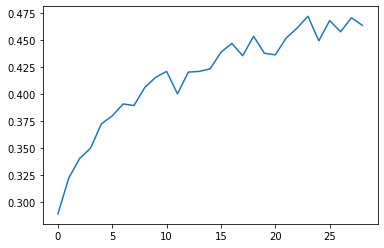

In [108]:
# Q3_graded
# Do not change the above line.


(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train, x_test = x_train / 255, x_test / 255

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

layers = [2, 3]

for layer_num in layers:
    for momentum in [True, False]:
        for weight_decay in [True, False]:
            create_train_model(x_train, y_train, x_test, y_test, layer_num, weight_decay, momentum)

# Type your code here

# Q5. Extra


In [ ]:
# Q5_graded
# Do not change the above line.

# Type your code here

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID.
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI002_HW1.ipynb`
    - `Q2.py`
    - `Q3.py`
    - `Q5.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.